# Project: Wrangling and Analyze Data

In this project I will be gathering, assessing, cleaning and analysing data from the WeRateDogs Twitter archive data. WeRateDogs is a Twitter account with over 4 million followers that rates people's dogs. I will be using the following datasets:

● The first dataset (‘twitter-archive-enhanced.csv) is the enhanced archive data provided by Udacity, which contains extra columns for dog stages.
<br> ● The second is an image predictions file (image-predictions.tsv) that is a result of the WeRateDogs Twitter archive data being run through a neural network that can classify dog breeds.
<br> ● The third is Twitter’s API data (tweet-json.txt), from where I extracted the retweet_count and favorite_count columns for the WeRateDogs archive data.

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [5]:
# Before gathering data, import all necessary packages to use throughout the project
# install tweepy
!pip3 install tweepy

In [6]:
# Before gathering data, import all necessary packages to use throughout the project
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Load csv file for WeRateDogs Twitter archive data to a dataframe called df1
df1 = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [10]:
#define the url and use request.get method to create the request
#use split function to extract the tsv file after last slash
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_extract = url.split("/")[-1]
response = requests.get(url)
response

<Response [200]>

>200 is the http response code that the request has exceeded

In [11]:
#Open the tsv file and write the contents of the response variable to the file
with open(os.path.join('', file_extract), mode = 'wb') as file:
    file.write(response.content)
    
#Load tsv file to a dataframe called df2 and use sep method to show that it's a tsv file
#separated by '\' instead of commas like in a regular csv file
df2 = pd.read_csv(file_extract, sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [12]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336000
Fail
2: 892177421306343000
Fail
3: 891815181378084000
Fail
4: 891689557279858000
Fail
5: 891327558926688000
Fail
6: 891087950875897000
Fail
7: 890971913173991000
Fail
8: 890729181411237000
Fail
9: 890609185150312000
Fail
10: 890240255349198000
Fail
11: 890006608113172000
Fail
12: 889880896479866000
Fail
13: 889665388333682000
Fail
14: 889638837579907000
Fail
15: 889531135344209000
Fail
16: 889278841981685000
Fail
17: 888917238123831000
Fail
18: 888804989199671000
Fail
19: 888554962724278000
Fail
20: 888202515573088000
Fail
21: 888078434458587000
Fail
22: 887705289381826000
Fail
23: 887517139158093000
Fail
24: 887473957103951000
Fail
25: 887343217045368000
Fail
26: 887101392804085000
Fail
27: 886983233522544000
Fail
28: 886736880519319000
Fail
29: 886680336477933000
Fail
30: 886366144734445000
Fail
31: 886267009285017000
Fail
32: 886258384151887000
Fail
33: 886054160059072000
Fail
34: 885984800019947000
Fail
35: 885528943205470000
Fail
36: 885518971528720000
Fail
3

Fail
288: 838561493054533000
Fail
289: 838476387338051000
Fail
290: 838201503651401000
Fail
291: 838150277551247000
Fail
292: 838085839343206000
Fail
293: 838083903487373000
Fail
294: 837820167694528000
Fail
295: 837482249356513000
Fail
296: 837471256429613000
Fail
297: 837366284874571000
Fail
298: 837110210464448000
Fail
299: 837012587749474000
Fail
300: 836989968035819000
Fail
301: 836753516572119000
Fail
302: 836677758902222000
Fail
303: 836648853927522000
Fail
304: 836397794269200000
Fail
305: 836380477523124000
Fail
306: 836260088725786000
Fail
307: 836001077879255000
Fail
308: 835685285446955000
Fail
309: 835574547218894000
Fail
310: 835536468978302000
Fail
311: 835309094223372000
Fail
312: 835297930240217000
Fail
313: 835264098648616000
Fail
314: 835246439529840000
Fail
315: 835172783151792000
Fail
316: 835152434251116000
Fail
317: 834931633769889000
Fail
318: 834786237630337000
Fail
319: 834574053763584000
Fail
320: 834477809192075000
Fail
321: 834458053273591000
Fail
322: 8342

Fail
571: 801854953262350000
Fail
572: 801538201127157000
Fail
573: 801285448605831000
Fail
574: 801167903437357000
Fail
575: 801127390143516000
Fail
576: 801115127852503000
Fail
577: 800859414831898000
Fail
578: 800855607700029000
Fail
579: 800751577355128000
Fail
580: 800513324630806000
Fail
581: 800459316964663000
Fail
582: 800443802682937000
Fail
583: 800388270626521000
Fail
584: 800188575492947000
Fail
585: 800141422401830000
Fail
586: 800018252395122000
Fail
587: 799774291445383000
Fail
588: 799757965289017000
Fail
589: 799422933579902000
Fail
590: 799308762079035000
Fail
591: 799297110730567000
Fail
592: 799063482566066000
Fail
593: 798933969379225000
Fail
594: 798925684722855000
Fail
595: 798705661114773000
Fail
596: 798701998996647000
Fail
597: 798697898615730000
Fail
598: 798694562394996000
Fail
599: 798686750113755000
Fail
600: 798682547630837000
Fail
601: 798673117451325000
Fail
602: 798665375516884000
Fail
603: 798644042770751000
Fail
604: 798628517273620000
Fail
605: 7985

Fail
854: 765371061932261000
Fail
855: 765222098633691000
Fail
856: 764857477905154000
Fail
857: 764259802650378000
Fail
858: 763956972077010000
Fail
859: 763837565564780000
Fail
860: 763183847194451000
Fail
861: 763167063695355000
Fail
862: 763103485927849000
Fail
863: 762699858130116000
Fail
864: 762471784394268000
Fail
865: 762464539388485000
Fail
866: 762316489655476000
Fail
867: 762035686371364000
Fail
868: 761976711479193000
Fail
869: 761750502866649000
Fail
870: 761745352076779000
Fail
871: 761672994376806000
Fail
872: 761599872357261000
Fail
873: 761371037149827000
Fail
874: 761334018830917000
Fail
875: 761292947749015000
Fail
876: 761227390836215000
Fail
877: 761004547850530000
Fail
878: 760893934457552000
Fail
879: 760656994973933000
Fail
880: 760641137271070000
Fail
881: 760539183865880000
Fail
882: 760521673607086000
Fail
883: 760290219849637000
Fail
884: 760252756032651000
Fail
885: 760190180481531000
Fail
886: 760153949710192000
Fail
887: 759943073749200000
Fail
888: 7599

Fail
1132: 728986383096946000
Fail
1133: 728760639972315000
Fail
1134: 728751179681943000
Fail
1135: 728653952833728000
Fail
1136: 728409960103686000
Fail
1137: 728387165835677000
Fail
1138: 728046963732717000
Fail
1139: 728035342121635000
Fail
1140: 728015554473250000
Fail
1141: 727685679342333000
Fail
1142: 727644517743104000
Fail
1143: 727524757080539000
Fail
1144: 727314416056803000
Fail
1145: 727286334147182000
Fail
1146: 727175381690781000
Fail
1147: 727155742655025000
Fail
1148: 726935089318363000
Fail
1149: 726887082820554000
Fail
1150: 726828223124897000
Fail
1151: 726224900189511000
Fail
1152: 725842289046749000
Fail
1153: 725786712245440000
Fail
1154: 725729321944506000
Fail
1155: 725458796924002000
Fail
1156: 724983749226668000
Fail
1157: 724771698126512000
Fail
1158: 724405726123311000
Fail
1159: 724049859469295000
Fail
1160: 724046343203856000
Fail
1161: 724004602748780000
Fail
1162: 723912936180330000
Fail
1163: 723688335806480000
Fail
1164: 723673163800948000
Fail
1165:

Fail
1406: 699323444782047000
Fail
1407: 699088579889332000
Fail
1408: 699079609774645000
Fail
1409: 699072405256409000
Fail
1410: 699060279947165000
Fail
1411: 699036661657767000
Fail
1412: 698989035503689000
Fail
1413: 698953797952008000
Fail
1414: 698907974262222000
Fail
1415: 698710712454139000
Fail
1416: 698703483621523000
Fail
1417: 698635131305795000
Fail
1418: 698549713696649000
Fail
1419: 698355670425473000
Fail
1420: 698342080612007000
Fail
1421: 698262614669991000
Fail
1422: 698195409219559000
Fail
1423: 698178924120031000
Fail
1424: 697995514407682000
Fail
1425: 697990423684476000
Fail
1426: 697943111201378000
Fail
1427: 697881462549430000
Fail
1428: 697630435728322000
Fail
1429: 697616773278015000
Fail
1430: 697596423848730000
Fail
1431: 697575480820686000
Fail
1432: 697516214579523000
Fail
1433: 697482927769255000
Fail
1434: 697463031882764000
Fail
1435: 697270446429966000
Fail
1436: 697259378236399000
Fail
1437: 697255105972801000
Fail
1438: 697242256848379000
Fail
1439:

Fail
1680: 682032003584274000
Fail
1681: 682003177596559000
Fail
1682: 681981167097122000
Fail
1683: 681891461017812000
Fail
1684: 681694085539872000
Fail
1685: 681679526984871000
Fail
1686: 681654059175129000
Fail
1687: 681610798867845000
Fail
1688: 681579835668455000
Fail
1689: 681523177663676000
Fail
1690: 681340665377193000
Fail
1691: 681339448655802000
Fail
1692: 681320187870711000
Fail
1693: 681302363064414000
Fail
1694: 681297372102656000
Fail
1695: 681281657291280000
Fail
1696: 681261549936340000
Fail
1697: 681242418453299000
Fail
1698: 681231109724700000
Fail
1699: 681193455364796000
Fail
1700: 680970795137544000
Fail
1701: 680959110691590000
Fail
1702: 680940246314430000
Fail
1703: 680934982542561000
Fail
1704: 680913438424612000
Fail
1705: 680889648562991000
Fail
1706: 680836378243002000
Fail
1707: 680805554198020000
Fail
1708: 680801747103793000
Fail
1709: 680798457301471000
Fail
1710: 680609293079592000
Fail
1711: 680583894916304000
Fail
1712: 680497766108381000
Fail
1713:

Fail
1954: 673662677122719000
Fail
1955: 673656262056419000
Fail
1956: 673636718965334000
Fail
1957: 673612854080196000
Fail
1958: 673583129559498000
Fail
1959: 673580926094458000
Fail
1960: 673576835670777000
Fail
1961: 673363615379013000
Fail
1962: 673359818736984000
Fail
1963: 673355879178194000
Fail
1964: 673352124999274000
Fail
1965: 673350198937153000
Fail
1966: 673345638550134000
Fail
1967: 673343217010679000
Fail
1968: 673342308415348000
Fail
1969: 673320132811366000
Fail
1970: 673317986296586000
Fail
1971: 673295268553605000
Fail
1972: 673270968295534000
Fail
1973: 673240798075449000
Fail
1974: 673213039743795000
Fail
1975: 673148804208660000
Fail
1976: 672997845381865000
Fail
1977: 672995267319328000
Fail
1978: 672988786805112000
Fail
1979: 672984142909456000
Fail
1980: 672980819271634000
Fail
1981: 672975131468300000
Fail
1982: 672970152493887000
Fail
1983: 672968025906282000
Fail
1984: 672964561327235000
Fail
1985: 672902681409806000
Fail
1986: 672898206762672000
Fail
1987:

Fail
2228: 668268907921326000
Fail
2229: 668256321989451000
Fail
2230: 668248472370458000
Fail
2231: 668237644992782000
Fail
2232: 668226093875376000
Fail
2233: 668221241640230000
Fail
2234: 668204964695683000
Fail
2235: 668190681446379000
Fail
2236: 668171859951755000
Fail
2237: 668154635664932000
Fail
2238: 668142349051129000
Fail
2239: 668113020489474000
Fail
2240: 667937095915278000
Fail
2241: 667924896115245000
Fail
2242: 667915453470232000
Fail
2243: 667911425562669000
Fail
2244: 667902449697558000
Fail
2245: 667886921285246000
Fail
2246: 667885044254572000
Fail
2247: 667878741721415000
Fail
2248: 667873844930215000
Fail
2249: 667866724293877000
Fail
2250: 667861340749471000
Fail
2251: 667832474953625000
Fail
2252: 667806454573760000
Fail
2253: 667801013445750000
Fail
2254: 667793409583771000
Fail
2255: 667782464991965000
Fail
2256: 667773195014021000
Fail
2257: 667766675769573000
Fail
2258: 667728196545200000
Fail
2259: 667724302356258000
Fail
2260: 667550904950915000
Fail
2261:

In [35]:
#List of dictionaries to build and convert to a dataframe later
df_list = []

#Read the txt file line by line into a pandas dataframe with tweet ID,
#retweet count and favorite count
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        
    #append to list of dictionaries  
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

#Convert list to pandas Dataframe    
df3 = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### 1. Assess the WeRate Dogs Twitter archive data (df1) first.

In [14]:
df1.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336000,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343000,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084000,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858000,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688000,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897000,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991000,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237000,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312000,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198000,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1530,690021994562220000,NaN,NaN,2016-01-21 04:03:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Geoff (pronounced ""Kyle""). He acc...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/690021994...,10,10,Geoff,None,None,None,None
924,755206590534418000,NaN,NaN,2016-07-19 01:04:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one of the most inspirational stories ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755206590...,14,10,one,doggo,None,None,None
977,750011400160841000,NaN,NaN,2016-07-04 17:00:26 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Piper. She's an airport doggo. Please ret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750011400...,11,10,Piper,doggo,None,None,None
1924,674075285688614000,NaN,NaN,2015-12-08 03:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mitch. He thinks that's a hat. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674075285...,11,10,Mitch,None,None,None,None
1940,673716320723169000,6.740000e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None


> name columns: 'not' in row 988 looks out of place, so as 'such' in row 22, 'a' in row 1877 etc.

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> Too many null values for columns 1, 2, 6, 7 and 8. 
>
><br> tweet_id should be a string.

In [20]:
df1.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [21]:
#test datatypes of some variables appearing as object datatype

# Create dataframe for the variables
objects_df = pd.DataFrame(data=df1, columns = ['timestamp', 'source', 'text', 'name', 'doggo', 'floofer',
                                               'pupper', 'puppo'])

#Create for loop to return all the datatypes
for column in objects_df:
    print(column)
    print(type(df1[column][0]))

timestamp
<class 'str'>
source
<class 'str'>
text
<class 'str'>
name
<class 'str'>
doggo
<class 'str'>
floofer
<class 'str'>
pupper
<class 'str'>
puppo
<class 'str'>


> Returns string datatype for all variables.
<br> Wrong datatype for timestamp. 

In [22]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455128e+17,2.015385e+16,7.720221e+17,1.241437e+16,13.126486,10.455433
std,6.856705e+16,7.583419e+16,1.253546e+17,6.236131e+16,9.597227e+16,45.876648,6.745237
min,6.660209e+17,6.660000e+17,1.185634e+07,6.660000e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.760000e+17,3.086374e+08,7.190000e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.035000e+17,4.196984e+09,7.800000e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.260000e+17,4.196984e+09,8.200000e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.860000e+17,8.410000e+17,8.870000e+17,7.870000e+17,1776.000000,170.000000


>Rating denominator and numerator have max values that are too high.

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

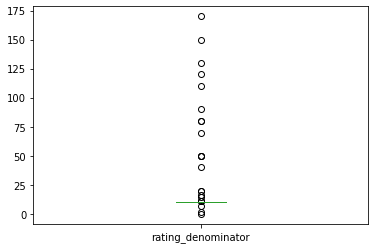

In [23]:
df1.rating_denominator.plot.box()
df1.rating_denominator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

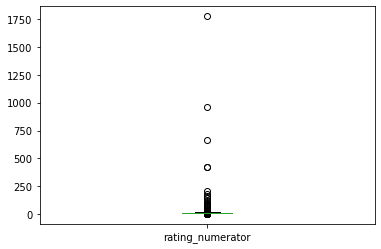

In [24]:
df1.rating_numerator.plot.box()
df1.rating_numerator.value_counts()

>Both variables have a lot of extreme outliers. But it is not a problem for rating_numerator as this is part of WeRateDog's 
> unique rating system.

In [25]:
df1.duplicated().sum()

0

>There are zero duplicate rows.

#### 2. Assess the tweet images predictions data (df2).

In [26]:
df2.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [27]:
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True
1018,710117014656950272,https://pbs.twimg.com/media/CdrXp9dWoAAcRfn.jpg,2,toy_poodle,0.802092,True,miniature_poodle,0.111647,True,cocker_spaniel,0.062866,True
1777,828381636999917570,https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg,1,Bedlington_terrier,0.392535,True,Labrador_retriever,0.089022,True,clumber,0.081800,True
747,687704180304273409,https://pbs.twimg.com/media/CYs3TKzUAAAF9A2.jpg,1,miniature_pinscher,0.956063,True,toy_terrier,0.012231,True,Chihuahua,0.005397,True
1955,864279568663928832,https://pbs.twimg.com/media/C_6JrWZVwAAHhCD.jpg,1,bull_mastiff,0.668613,True,French_bulldog,0.180562,True,Staffordshire_bullterrier,0.052237,True


>Under columns p1, p2 and p3, there are values that are not dog breeds, e.g., desktop_computer for (p1, row 18), shopping basket
for (p2, row 8) and bookcase for (p3, row 18).
>
><br> p1, p2 and p3 belong to one column, and so do p1_conf, p2_conf and p3_conf.

>img_num implies that some ids appear in more than one row. The first 20 rows all show a value of 1 but further assessment with
the sample() method shows values such as 3 (row 1303), 2 (row 632) and 4 (row 1286).

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


>tweet_id should be a string.
>
><br> There appear to be no missing values for all columns.

In [29]:
#test datatypes of some variables appearing as object datatype

# Create dataframe for the variables
is_objects_df = pd.DataFrame(data=df2, columns = ['jpg_url', 'p1', 'p2', 'p3'])

#Create for loop to return all the datatypes
for column in is_objects_df:
    print(column)
    print(type(df2[column][0]))

jpg_url
<class 'str'>
p1
<class 'str'>
p2
<class 'str'>
p3
<class 'str'>


> Returns correct datatypes for all variables.

In [30]:
df2.duplicated().sum()

0

>There are zero duplicate rows.

In [31]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### 3. Assess the Twitter API data

In [36]:
df3.head(20)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [37]:
df3.tail(10)

,tweet_id,retweet_count,favorite_count
2344,666058600524156928,61,115
2345,666057090499244032,146,304
2346,666055525042405380,261,448
2347,666051853826850816,879,1253
2348,666050758794694657,60,136
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [38]:
df3.sample(5)

,tweet_id,retweet_count,favorite_count
2259,667549055577362432,2454,6138
1140,727524757080539137,1379,4900
1413,698703483621523456,425,1608
1095,736225175608430592,3115,8901
1440,696754882863349760,396,1615


>favorite_count is generally greater than retweet_coount, but some dog images have favorite_count values of zero (row 596, row 249, row 744 etc.) while having high retweet counts.

In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


> tweet_id should be a string.
>
><br> There appear to be no missing values for all columns.

In [40]:
df3.duplicated().sum()

0

>There are no duplicate rows.

In [41]:
df3.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


<AxesSubplot:>

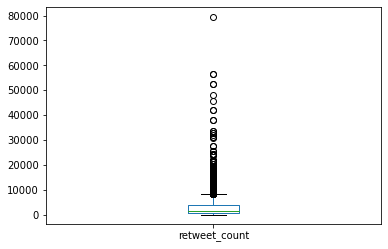

In [42]:
df3.retweet_count.plot.box()

<AxesSubplot:>

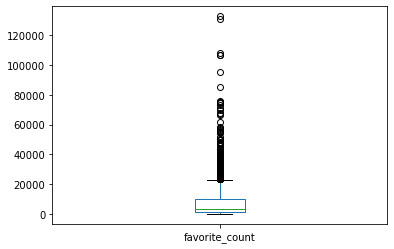

In [43]:
df3.favorite_count.plot.box()

> There are quite a lot of outliers for both retweet_count and favorite_count, but it's understandable as the Twitter algorithm
and the popularity of the account posting determine the exposure that a tweet gets. 
>
><br> Both variables have interestingly similar boxplot distributions and patterns in their outliers.

### Quality issues

1. Incorrect datatypes for tweet_id in all dataframes and timestamp in df1

2. There should only be one rating_denominator i.e. 10.

3. Some of the rows show retweets instead of original tweets.

4. Some of the rows show replies instead of original tweets

5. In df1, there are too many null values for columns such as in_reply_to_status_id, in_reply_to_user_id , retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp, rendering the columns useless for analysis.

6. Words such as 'a', 'such' and 'not' do not belong under name column because a) They are closed classes i.e., articles,    prepositions, adverbs etc. making them unusual for given names, and b) They start with lower case, unlike all the other dog  names that start with upper case.

7. All 'None' entries under dog stages (doggo, floofer, pupper and puppo) should be null values.

8. In df2, not all image predictions show dog breeds.

### Tidiness issues
1. In df1 doggo, floofer, pupper and puppo are in separate columns when they should be under one variable.

2. Dog breeds (p1, p2 and p3) should be under one column, and so should confidence levels, so that there is one observation per
   tweet_id.

3. Variables in df1, df2 and df3 are part of one observational unit i.e. tweet_id. Therefore all 3 dataframes should be one table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [60]:
# Make copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### Issue #0: Before cleaning the quality and tidiness issues, replace the df1_clean[tweet_id] column with           <br> &emsp; &emsp; &emsp; &ensp; values from df3_clean['tweet_id'] because the df1_clean values are all  <br>&emsp; &emsp; &emsp; &ensp; rounded off to the nearest thousand.

#### Define: Drop the tweet_id column in df1 and concatenate the tweet_id column from df3.

#### Code

In [61]:
#One problem is df3 has two less values than df1, so there needs to be further assessment and some cleaning i.e. the 2 rows need
#to be dropped, before concatenation
df1_clean.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336000,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343000,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084000,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858000,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688000,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897000,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991000,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237000,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312000,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198000,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [62]:
df3_clean.head(20)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [63]:
df1_clean.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822000,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800000,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032000,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620000,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790000,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [64]:
df3_clean.tail(5)

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


> The above assessments show that tweet_ids for both dataframes start and end with the same values, so the 2 extra rows in df1_clean are somewhere in the middle of the dataframe. Further visual and programmatic assessment are required to locate the index numbers of the 2 rows.
>
><br> 1. We can already see from df1_clean.head(20) and df3_clean.head(20) that the tweet ids for index 19 are not the same.
><br> 2. df1_clean(tweet_id, index 19) = 888202515573088000	, while df3_clean(tweet_id, index 19) = 888078434458587136. 
><br> 3. After row index 19, ids for df3_clean start lagging behind those of df1_clean by 1 row.

In [65]:
#Following the numeric difference of 1 in index numbers, further visual assessment using df1_clean.head(n) and df3_clean.head(n)
#, with various n values shows that the second extra value is between indices 800 and 900.

#Assess rows between 800 and 900 specifically and narrow down the range as needed
df1_clean[800: 900]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
800,772615324260794000,NaN,NaN,2016-09-05 02:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gromit. He's pupset bec...,7.650000e+17,4.196984e+09,2016-08-15 16:22:20 +0000,https://twitter.com/dog_rates/status/765222098...,10,10,Gromit,None,None,None,None
801,772581559778025000,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
802,772193107915964000,NaN,NaN,2016-09-03 22:02:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Willem. He's a Penn State pupper. Thin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772193107...,12,10,Willem,None,None,pupper,None
803,772152991789019000,NaN,NaN,2016-09-03 19:23:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a couple rufferees making sure all the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772152991...,10,10,None,None,None,None,None
804,772117678702071000,NaN,NaN,2016-09-03 17:02:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's a Clemson pup. Appears to be r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772117678...,12,10,Jack,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,759159934323924000,NaN,NaN,2016-07-29 22:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: AT DAWN...\nWE RIDE\n\n11/10 ht...,6.700000e+17,4.196984e+09,2015-11-27 19:11:49 +0000,https://twitter.com/dog_rates/status/670319130...,11,10,None,None,None,None,None
896,759099523532779000,NaN,NaN,2016-07-29 18:53:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He has a drinking problem. Inflatab...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759099523...,7,10,Toby,None,None,None,None
897,759047813560868000,NaN,NaN,2016-07-29 15:27:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spencer. He's part of the Queen's Guar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759047813...,11,10,Spencer,None,None,None,None
898,758854675097526000,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lilli Bee &amp; Honey Bear. Unfortunat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758854675...,11,10,Lilli,None,None,None,None


In [66]:
df3_clean[800: 900]

,tweet_id,retweet_count,favorite_count
800,772581559778025472,1968,7192
801,772193107915964416,1612,6665
802,772152991789019136,1300,4181
803,772117678702071809,848,4165
804,772114945936949249,546,3005
...,...,...,...
895,759047813560868866,2302,7227
896,758854675097526272,1027,3904
897,758828659922702336,4376,12376
898,758740312047005698,1824,6339


In [67]:
df1_clean[810: 820]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
810,771380798096281000,NaN,NaN,2016-09-01 16:14:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fizz. She thinks love is a social constru...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771380798...,11,10,Fizz,None,None,None,None
811,771171053431250000,NaN,NaN,2016-09-01 02:21:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Frankie. He's wearing b...,6.730000e+17,4.196984e+09,2015-12-06 01:56:44 +0000,https://twitter.com/dog_rates/status/673320132...,11,10,Frankie,None,None,None,None
812,771136648247640000,NaN,NaN,2016-09-01 00:04:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dixie. She wants to be a ship captain....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771136648...,11,10,Dixie,None,None,None,None
813,771102124360998000,NaN,NaN,2016-08-31 21:47:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He works for @TODAYshow. Supe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771102124...,12,10,Charlie,None,None,None,None
814,771014301343748000,NaN,NaN,2016-08-31 15:58:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another pic without a dog in it? What am I sup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771014301...,7,10,None,None,None,None,None
815,771004394259247000,NaN,NaN,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @katieornah: @dog_rates learning a lot at c...,7.710000e+17,1.732729e+09,2016-08-31 15:10:07 +0000,https://twitter.com/katieornah/status/77100213...,12,10,None,None,None,pupper,None
816,770787852854652000,NaN,NaN,2016-08-31 00:58:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His tongue has gone rogue. Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770787852...,10,10,Winston,None,None,None,None
817,770772759874076000,NaN,NaN,2016-08-30 23:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He's super h*ckin fluffy. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770772759...,11,10,Sebastian,None,None,None,None
818,770743923962707000,NaN,NaN,2016-08-30 22:04:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a doggo blowing bubbles....,7.390000e+17,4.196984e+09,2016-06-04 23:31:25 +0000,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,None,None,None
819,770655142660169000,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None


In [68]:
df3_clean[800: 830]

,tweet_id,retweet_count,favorite_count
800,772581559778025472,1968,7192
801,772193107915964416,1612,6665
802,772152991789019136,1300,4181
803,772117678702071809,848,4165
804,772114945936949249,546,3005
805,772102971039580160,1065,4448
806,771908950375665664,2181,7298
807,771770456517009408,3924,13356
808,771500966810099713,3018,9167
809,771380798096281600,5912,11746


>The tweet_id at df1_clean[815] = 771004394259247000. The same value should be at df3_clean[814], given the lag caused by  >df1_clean[19], but df3[814] = 770787852854652928, which is the same id at df1[816], so there starts to be a lag of 2.

In [69]:
#In df1_clean, drop rows with indices 19 and 815
df1_clean = df1_clean.drop([19, 815])

In [70]:
df1_clean.shape

(2354, 17)

>The dataframe now has the same number of rows as df3_clean, so it is now ready for concatenation.

In [71]:
#Drop tweet_id column from df1_clean
df1_clean.drop(['tweet_id'], axis=1, inplace=True)

In [72]:
df1_clean.head(0)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [73]:
#Concatenate df3_clean['tweet_id'] to df1_clean
df1_clean = pd.concat([df3_clean['tweet_id'], df1_clean], axis=1, join='inner')

#### Test

In [74]:
df1_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


>tweet_id is now written in full like in df3_clean. However, the datatype is still int like in df3_clean and will need to be converted to a string.

### Quality Issue #1: Incorrect datatype for timestamp

#### Define: Convert timestamp from string to datetime

#### Code

In [75]:
df1_clean['timestamp'] = df1_clean['timestamp'].astype('datetime64[ns]')

#### Test

In [77]:
type(df1_clean['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

>Timestamp is the pandas equivalent of Python's Datetime, and they are usually interchangeable. 

### Quality Issue #2: There should only be one rating_denominator i.e. 10.

#### Define: Drop rating denominators that are not equal to 10

#### Code

In [78]:
df1_clean = df1_clean[df1_clean['rating_denominator'] == 10]

#### Test

In [79]:
df1_clean.rating_denominator.unique()

array([10], dtype=int64)

> Only values equal to 10 remain in this column.

### Quality Issue #3: Some of the rows show retweets instead of original tweets.

#### Define: Drop rows that have retweets

#### Code:

In [80]:
# Original tweets have null values under retweeted_status_id, so filter the null values to drop retweets.
df1_clean = df1_clean[df1_clean['retweeted_status_id'].isnull()]

#### Test

In [81]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 0 to 2353
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2151 non-null   int64         
 1   in_reply_to_status_id       73 non-null     float64       
 2   in_reply_to_user_id         73 non-null     float64       
 3   timestamp                   2151 non-null   datetime64[ns]
 4   source                      2151 non-null   object        
 5   text                        2151 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2097 non-null   object        
 10  rating_numerator            2151 non-null   int64         
 11  rating_denominator          2151 non-null   int64       

> All rewteeted_status_id values are null, which means that we're now left with original tweets and replies.

### Quality Issue #4: Some of the rows show replies instead of original tweets

#### Define: Drop rows that have replies.

#### Code

In [82]:
# Original tweets have null values under in_reply_to_status_id, so filter the null values to drop retweets.
df1_clean = df1_clean[df1_clean['in_reply_to_status_id'].isnull()]

#### Test

In [83]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2353
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2078 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2078 non-null   datetime64[ns]
 4   source                      2078 non-null   object        
 5   text                        2078 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2075 non-null   object        
 10  rating_numerator            2078 non-null   int64         
 11  rating_denominator          2078 non-null   int64       

> All in_reply_to_status_id vales are null, which means we're only left with original tweets.

### Quality Issue #5: In df1, there are too many null values for some columns

#### Define: Drop unnecessary columns with too many missing values

#### Code

In [84]:
# Also drop rating_denominator as it is now a constant
df1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
             'retweeted_status_timestamp', 'rating_denominator'], axis = 1, inplace = True)

#### Test

In [85]:
df1_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None


### Quality Issue #6: Unusual dog names, which also start with lower case.

#### Define: Drop drows with dog names that start with lower case

#### Code

In [86]:
# Filter values that start with upper case and assign then to df1_clean so that the lower case names are dropped
df1_clean = df1_clean[df1_clean['name'].str[0].str.isupper()]

#### Test

In [87]:
df1_clean[df1_clean['name'].str[0].str.islower()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo


> It returns an empty table, showing that the names starting with lower case have been dropped.

### Tidiness Issue #1: In df1 doggo, floofer, pupper and puppo are in separate should be under one variable.

#### Define: Create a column called dog_stages by concatenating the 4 columns

#### Code

In [88]:
# Replace the None values with the empty character so that 'None' doesn't also get concatenated with actual dog stages.
# This also partially cleans quality issue # 8, which will be completely cleaned in the following issue.

df1_clean.doggo=df1_clean.doggo.replace('None','')
df1_clean.floofer=df1_clean.floofer.replace('None','')
df1_clean.pupper=df1_clean.pupper.replace('None','')
df1_clean.puppo=df1_clean.puppo.replace('None','')

# Concatenate the 4 columns to create the dog_stages column
df1_clean['dog_stages'] = df1_clean['doggo'] + df1_clean['floofer'] + df1_clean['pupper'] + df1_clean['puppo']

# Drop the 4 separate dog stage columns as they are no longer useful
df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Test

In [89]:
df1_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,


### Quality Issue #7: All 'None' entries under dog stages should be null values.

#### Define: None' values have already been replaced with empty space in the previous issue. Replace empty entries with NaN.

#### Code

In [90]:
# Check initial non-null count for dog_stages to make sure it's equal to the full number of entries in dataframe.
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 2351
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1978 non-null   int64         
 1   timestamp         1978 non-null   datetime64[ns]
 2   source            1978 non-null   object        
 3   text              1978 non-null   object        
 4   expanded_urls     1975 non-null   object        
 5   rating_numerator  1978 non-null   int64         
 6   name              1978 non-null   object        
 7   dog_stages        1978 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 139.1+ KB


In [91]:
# Replace empty character column values under dog_stages with NaN
df1_clean.dog_stages=df1_clean.dog_stages.replace('',np.nan)

#### Test

In [92]:
# Check that non-null count for dog_stages has reduced
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 2351
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1978 non-null   int64         
 1   timestamp         1978 non-null   datetime64[ns]
 2   source            1978 non-null   object        
 3   text              1978 non-null   object        
 4   expanded_urls     1975 non-null   object        
 5   rating_numerator  1978 non-null   int64         
 6   name              1978 non-null   object        
 7   dog_stages        322 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 139.1+ KB


> The non-null count for dog_stages has now reduced to 322.

In [93]:
# Check unique values of dog_stages to ensure that there are no further issues
df1_clean.dog_stages.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

> Some dogs have more than one stage. 

### Tidiness Issue #2:Dog breeds in df2 (p1, p2 and p3) should be under one column, and so should confidence levels.        

#### Define: Combine p1, p2 and p2 into one column, and p1_conf, p2_conf and p3_conf. 

#### Code

In [ ]:
# Create a column for dog breeds and for highest confidence level of dog breed per row.

#But before that, use query method to ensure that p1_conf > p2_conf > p3_conf. Once confirmed, it will be safe to assume that 
#the confidence level for the first instance of dog breed is always the highest confidence level for dog breed, making it easier
#to set conditions to create the new columns.

#Add info() at the end of code to verify that (no. of rows queries) = (no. of rows in orginal dataframe), which will confirm 
#that for all rows p1_conf > p2_conf > p3_conf

In [94]:
df2_clean.query('p1_conf > p2_conf & p1_conf > p3_conf & p2_conf > p3_conf').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.2+ KB


In [95]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> The queried rows are the same as the original dataframe ∴ p1_conf > p2_conf > p3_conf for all rows.

In [96]:
# Create a column called p_conf, for the highest condifence level, from first instance of p1_dog = True
# Create another column called dog_breed to group dog breeds under one column

# Define 2 lists, which are to be used to append dog breed values and highest confidence levels.
dog_breed = []
p_conf = []
for i, row in df2_clean.iterrows():
    if row['p1_dog']==True: 
        dog_breed.append(row['p1'])
        p_conf.append(row['p1_conf'])
    elif row['p2_dog']==True:
        dog_breed.append(row['p2'])
        p_conf.append(row['p2_conf'])
    elif row['p3_dog']==True: 
        dog_breed.append(row['p3'])
        p_conf.append(row['p3_conf'])
        
    else: 
        dog_breed.append(np.nan)
        p_conf.append(np.nan)

# Assign the lists to the new columns
df2_clean['dog_breed'] = dog_breed
df2_clean['p_conf'] = p_conf

In [97]:
#Drop the image prediction, confidence level and dog boolean columns as they are no longer necessary. Also drop img_num.
df2_clean.drop(['p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 
                'p2_dog','p3_dog', 'img_num'], axis = 1, inplace = True)

#### Test

In [98]:
df2_clean.head(5)

,tweet_id,jpg_url,dog_breed,p_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [99]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   2075 non-null   int64  
 1   jpg_url    2075 non-null   object 
 2   dog_breed  1751 non-null   object 
 3   p_conf     1751 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


> p_conf has null values, which means there are still values that are not dog breeds.

### Quality Issue #8: In df2, not all image predictions show dog breeds.

#### Define: Drop all rows with no dog breeds

#### Code

In [100]:
#Drop all the null values as they are not dog breeds.
df2_clean = df2_clean.loc[~df2_clean.dog_breed.isnull()]

#### Test

In [101]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   1751 non-null   int64  
 1   jpg_url    1751 non-null   object 
 2   dog_breed  1751 non-null   object 
 3   p_conf     1751 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 68.4+ KB


> The number of non-null values for p_conf is now = number of entries, therefore all non-dog-breeds have been dropped.

### Tidiness Issue #3: Variables in df1, df2 and df3 are part of one observational unit i.e. tweet_id. 

#### Define: Merge all the cleaned dataframes into a master dataframe for analysis

#### Code

In [102]:
master_df = pd.merge(df2_clean, df1_clean, on='tweet_id')
master_df = pd.merge(master_df, df3_clean, on='tweet_id')

#### Test

In [108]:
master_df.head(5)

,tweet_id,jpg_url,dog_breed,p_conf,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stages,retweet_count,favorite_count
0,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,None,NaN,47,128
1,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493,2015-11-16 01:52:02,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,https://twitter.com/dog_rates/status/666071193...,9,None,NaN,61,115
2,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,0.775930,2015-11-16 01:59:36,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,https://twitter.com/dog_rates/status/666073100...,10,None,NaN,232,496
3,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,Gordon_setter,0.503672,2015-11-16 02:38:37,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,https://twitter.com/dog_rates/status/666082916...,6,None,NaN,67,154
4,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,Walker_hound,0.260857,2015-11-16 03:22:39,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,https://twitter.com/dog_rates/status/666094000...,9,None,NaN,174,335


### Quality Issue #1: tweet_id should be a string.

#### Define: Convert tweet_id to a string

#### Code

In [106]:
master_df.tweet_id = master_df.tweet_id.astype(str)

#### Test

In [109]:
type(master_df['tweet_id'][0])

str

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [110]:
master_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [111]:
#number of samples and columns in dataset
master_df.shape

(1466, 13)

> 1466 rows and 13 columns.

In [112]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 0 to 1465
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1466 non-null   object        
 1   jpg_url           1466 non-null   object        
 2   dog_breed         1466 non-null   object        
 3   p_conf            1466 non-null   float64       
 4   timestamp         1466 non-null   datetime64[ns]
 5   source            1466 non-null   object        
 6   text              1466 non-null   object        
 7   expanded_urls     1464 non-null   object        
 8   rating_numerator  1466 non-null   int64         
 9   name              1466 non-null   object        
 10  dog_stages        237 non-null    object        
 11  retweet_count     1466 non-null   int64         
 12  favorite_count    1466 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 192.6+ KB


In [113]:
master_df.describe()

,p_conf,rating_numerator,retweet_count,favorite_count
count,1466.000000,1466.000000,1466.000000,1466.000000
mean,0.547648,11.864256,3065.960437,8771.723056
std,0.301375,46.187125,5512.480105,12886.857409
min,0.000010,0.000000,16.000000,0.000000
25%,0.292723,10.000000,652.250000,1834.250000
50%,0.547977,11.000000,1421.500000,3897.500000
75%,0.821962,12.000000,3433.000000,10635.250000
max,0.999956,1776.000000,79515.000000,132810.000000


### 1. Plot distributions of Numeric Values

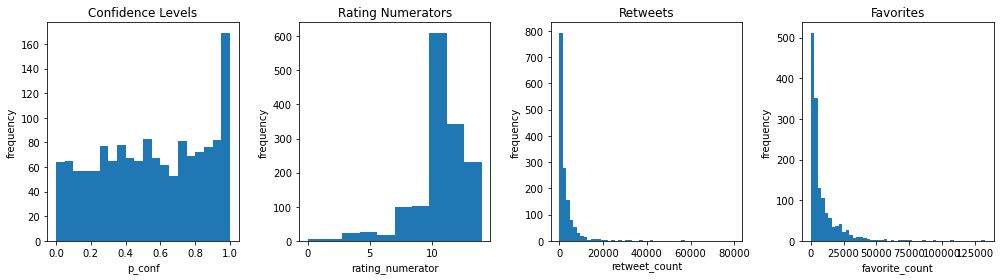

In [114]:
# plot distributions for confidence level, rating_numerator, retweet_count and favorite_count.
plt.subplots(figsize = (14, 4))

plt.subplot(1, 4, 1)
plt.hist(data = master_df, x = 'p_conf', bins = 20)
plt.title('Confidence Levels')
plt.xlabel('p_conf')
plt.ylabel('frequency')

#cut out extreme outliers to see shape of distribution much clearer. With outliers,the same distribution will have a longer tail
plt.subplot(1, 4, 2)
plt.hist(data = master_df.query('rating_numerator < 75'), x = 'rating_numerator', bins = 10)
plt.title('Rating Numerators')
plt.xlabel('rating_numerator')
plt.ylabel('frequency')

plt.subplot(1, 4, 3)
plt.hist(data = master_df, x = 'retweet_count', bins = 50)
plt.title('Retweets')
plt.xlabel('retweet_count')
plt.ylabel('frequency')

plt.subplot(1, 4, 4)
plt.hist(data = master_df, x = 'favorite_count', bins = 50)
plt.title('Favorites')
plt.xlabel('favorite_count')
plt.ylabel('frequency')

plt.tight_layout()

> <br> 1. p_conf has a more or less uniform distribution, with one prominent peak at the end. This is most likely because the variable is a combination of multiple sources of variation i.e., p_conf, p2_conf and p3_conf, which would need to be analysed separately to reveal any interesting patterns.
<br> 2. retweet_count and favorite_count are both extremely skewed to the right, which is consistent with mean being > than median for both variables. The data has a lot of extreme outliers, which makes sense given how the Twitter algorithm can promote certain tweets more than others, the likelihood of bot accounts engaging with certain tweets more than others, and also the fact that some tweets are older and have more time to accumulate likes and retweets.
<br> 3. rating_numerators are concentrated around 10 to 13. Because the distribution is truncated, a box plot is necessary to further inspect the distribution. 

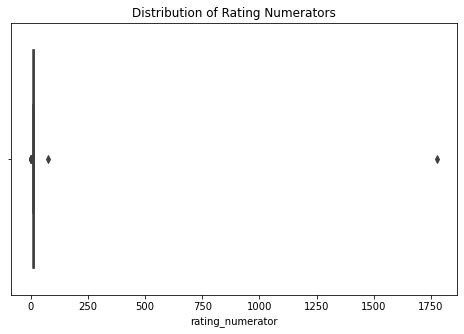

In [115]:
#Plot boxplot distribution for rating_numerator
plt.figure(figsize=(8,5))
sns.boxplot(x='rating_numerator',data=master_df)
plt.title("Distribution of Rating Numerators");

In [116]:
master_df.rating_numerator.value_counts()

12      343
10      320
11      290
13      207
9       102
8        67
7        33
5        27
14       23
6        18
3        15
4         9
2         5
1         4
75        1
0         1
1776      1
Name: rating_numerator, dtype: int64

> The boxplot distribution is a tiny slice, showing that values are concentrated around 10 to 13 ratings. Dogs are generally adored, so most dogs are likely to receive exaggerated ratings, within reasonable limits. This is also part of WeRateDog's unique rating system. Further inspection of value counts shows that there's only one extreme outlier (1776) left. Most extreme values were dropped when non-10 rating denominators were dropped. This outlier will be further inspected in the visualisation section for any interesting insights. I will also inspect one of the dogs with extremely low ratings like 0 and 1.

### 2. Inspect Relationships between Numeric Values

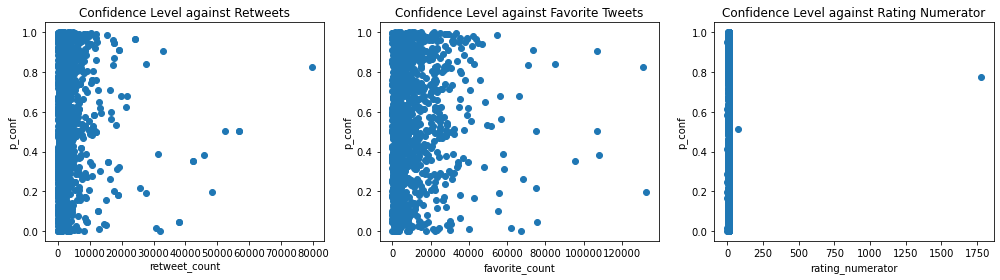

In [117]:
# plot relationship between p_conf and each of the following: retweet_count, favorite_count and rating_numerator.
plt.subplots(figsize = (14, 4))

# inspect relationship between confidence level and retweet count
plt.subplot(1, 3, 1)
plt.scatter(data=master_df, x='retweet_count', y= 'p_conf')
plt.title('Confidence Level against Retweets')
plt.xlabel('retweet_count')
plt.ylabel('p_conf')

# inspect relationship between confidence level and favorite count
plt.subplot(1, 3, 2)
plt.scatter(data=master_df, x='favorite_count', y='p_conf')
plt.title('Confidence Level against Favorite Tweets')
plt.xlabel('favorite_count')
plt.ylabel('p_conf')

# inspect relationship between confidence level and rating numerator
plt.subplot(1, 3, 3)
plt.scatter(data=master_df, x='rating_numerator', y='p_conf')
plt.title('Confidence Level against Rating Numerator')
plt.xlabel('rating_numerator')
plt.ylabel('p_conf')

plt.tight_layout()

> All 3 graphs show that there is no correlation between confidence level (p_conf) and retweet_count, favorite_count and rating_numerator, respectively. This means that there is no relationship between breed popularity (as it pertains to ratings and retweets) and likelihood of of being predicted correctly by the Neural Networks algorithm.

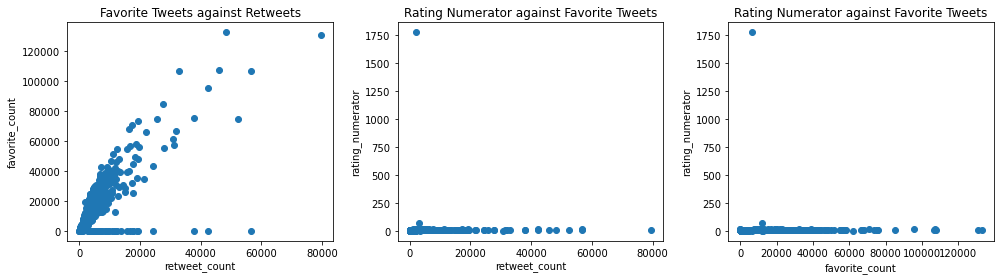

In [118]:
# inspect relationship between the following: favorite count vs retweet_count, 
# rating_numerator vs retweet_count, and rating_numerator vs favorite_count.
plt.subplots(figsize = (14, 4))

# inspect relationship between favorite count and retweet count
plt.subplot(1, 3, 1)
plt.scatter(data=master_df, x='retweet_count', y= 'favorite_count')
plt.title('Favorite Tweets against Retweets')
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')

# inspect relationship between rating numerator and retweet count
plt.subplot(1, 3, 2)
plt.scatter(data=master_df, x='retweet_count', y='rating_numerator')
plt.title('Rating Numerator against Favorite Tweets')
plt.xlabel('retweet_count')
plt.ylabel('rating_numerator')

# inspect relationship between rating numerator and favorite count
plt.subplot(1, 3, 3)
plt.scatter(data=master_df, x='favorite_count', y='rating_numerator')
plt.title('Rating Numerator against Favorite Tweets')
plt.xlabel('favorite_count')
plt.ylabel('rating_numerator')

plt.tight_layout()

><br> 1. There is no correlation between rating_numerator and either retweet_count or favorite_count because rating_numerator is generally concentrated around similar values, making the graphs appear constant.
<br> 2. However, but the first graph shows a positive correlation between favorite_count and retweet_count, which both have similar histogram distributions, and box plot distributions. There's also an interesting horizontal line along 0 favorite_count, showing 0 favorite_counts for retweet_counts that are surprisingly high.

### 3. What is the most Popular Dog Stage?

In [119]:
# Compare common dog stages with popular dog stages based on retweets by plotting bar graphs

# Print value counts for dog stages and mean retweets for dog stages, to use for plotting bar graphs

print("Common Dog Stages: ") # This is for the sole purpose of labelling the groups of values
print(master_df.dog_stages.value_counts())
print(" ") #print an empty line to separate both pieces of data
print("Mean Retweets per Dog Stage: ") # This is for the sole purpose of labelling the groups of values
print(master_df.groupby('dog_stages')['retweet_count'].mean())

Common Dog Stages: 
pupper          156
doggo            49
puppo            17
floofer           7
doggopupper       7
doggofloofer      1
Name: dog_stages, dtype: int64
 
Mean Retweets per Dog Stage: 
dog_stages
doggo           5661.204082
doggofloofer    6403.000000
doggopupper     2266.571429
floofer         2258.571429
pupper          2702.397436
puppo           6221.823529
Name: retweet_count, dtype: float64


In [ ]:
# Create a single  dataframe from both groups of data for easier plotting of both bar graphs
# Source: https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

In [120]:
data1 = {'dog_stages': ['pupper', 'doggo', 'puppo', 'floofer', 'doggo-pupper', 'doggo-floofer'],
        'value_counts': [156, 49, 17, 7, 7, 1],
        'mean_retweets': [2702, 5661, 6222, 2259, 2267, 6403]}

stages = pd.DataFrame(data=data1)
stages

,dog_stages,value_counts,mean_retweets
0,pupper,156,2702
1,doggo,49,5661
2,puppo,17,6222
3,floofer,7,2259
4,doggo-pupper,7,2267
5,doggo-floofer,1,6403


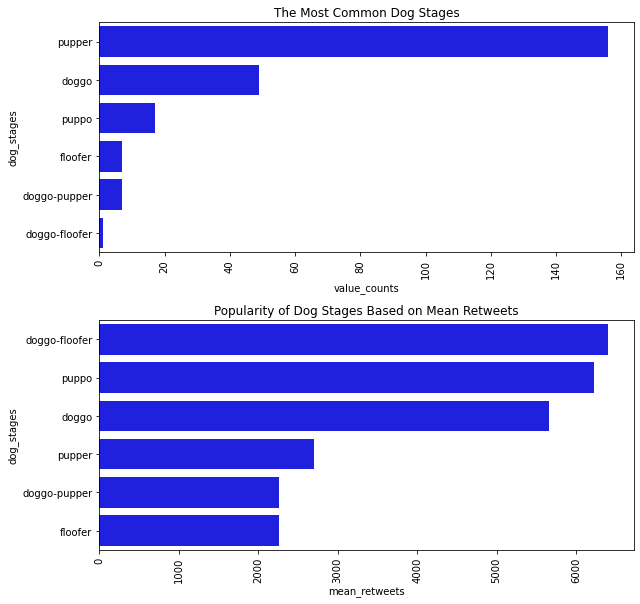

In [121]:
# Compare common dog stages with popular dog stages based on retweets by plotting bar graphs
# Source 1: https://www.kaggle.com/code/asimislam/tutorial-python-subplots
# Source 2: https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/

fig = plt.figure(figsize=(9,8.5))

# Plot a bar graph based on the value counts
plt.subplot(211)
plt.title('The Most Common Dog Stages')
sns.barplot(data=stages, x='value_counts',  y = 'dog_stages', color='blue')
plt.xticks(rotation=90)

# Plot a bar graph based on the mean of retweets for each stage
plt.subplot(212)
plt.title('Popularity of Dog Stages Based on Mean Retweets')
sns.barplot(data=stages, x = 'mean_retweets', y = 'dog_stages', color='blue', 
            order = stages.sort_values('mean_retweets', ascending = False).dog_stages)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

><br> 1. Pupper is the most common dog stage, yet it is the third least popular dog stage based on mean number of retweets.
><br> 2. Dogs in both the doggo and floofer stages are the least common yet they are the most popular.
><br> 3. It would have been interesting to break up doggo-pupper and doggo-floofer into the single stages but that is too complicated for this analysis.

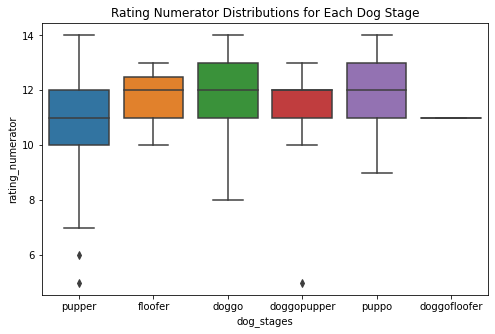

In [122]:
# Plot the rating_numerator distribution for each dog stage

plt.figure(figsize=(8,5))
sns.boxplot(data=master_df, x="dog_stages", y="rating_numerator")
plt.title("Rating Numerator Distributions for Each Dog Stage");

><br>1. Despite being the most common dog stage, pupper also is amongst dog stages with the lowest median rating numerator of around 11, along with doggo-pupper and doggo-floofer. Doggo-pupper's median is not visible, meaning it is at the lower end of the box, around 11.
><br>2. The boxplot for doggo-floofer is a thin slice, showing that the values are concentrated around a median of 11. It might be the most popular in terms of mean retweets, but it is amongst stages with the lowest median rating numerator.
><br>3. floofer, doggo and puppo have the highest median rating numerator of around 12. While doggo and puppo are already amongst the top 3 popular dog stages wrt mean retweets, floofer is the least popular wrt retweets, while being one of the stages with the highest median rating numerator.
><br>4. Amongst stages with the highest median rating, doggo and puppo have a more even spread and wider ranges of values, while floofer has a shorter range and is more left-skewed. floofer's ratings are concentrated around 12 to 13 and unlike doggo and puppo, floofer has no ratings below 10.
><br>5. pupper and and doggo-pupper have outliers on the lower end
><br>6. There are too many null values for dog_stages (there are only 237 non-null values out of 1466 entries). This poses a limitation to the analysis as a larger set of non-null entries would have probably given clearer and more accurate distributions. 

### 4. What is the most Popular Dog Breed?

In [ ]:
# Compare most predicted dog breeds (value counts) with popular dog breeds based on retweets by plotting bar graphs
# Choose the first 7 values per set as the list of dog breeds is too long

In [123]:
# Print value counts for dog breeds and mean retweets for dog breeds, to use for plotting bar graphs

print("Top 7 Most Predicted Dog Breeds: ") # This is for the sole purpose of labelling the groups of values
print(master_df.dog_breed.value_counts()[:7])

print(" ") #print an empty line to separate both pieces of data

print("Top 7 Mean Number of Retweets per Dog Breed: ")# This is for the sole purpose of labelling the groups of values
print(master_df.groupby('dog_breed')['retweet_count'].mean().sort_values(ascending = False)[:7])

Top 7 Most Predicted Dog Breeds: 
golden_retriever      143
Labrador_retriever     99
Chihuahua              84
Pembroke               80
pug                    60
chow                   42
Samoyed                38
Name: dog_breed, dtype: int64
 
Top 7 Mean Number of Retweets per Dog Breed: 
dog_breed
standard_poodle       11818.625000
Bedlington_terrier     8323.400000
Afghan_hound           8017.500000
cocker_spaniel         7665.375000
French_bulldog         5548.214286
English_springer       5401.600000
whippet                5339.666667
Name: retweet_count, dtype: float64


In [124]:
# Create a single dataframe from both groups of data for easier plotting of both bar graphs
data2 = {'predicted_breed': ['golden_retriever', 'Labrador_retriever', 'Chihuahua', 'Pembroke', 'pug', 'chow', 'Samoyed'],
        'value_counts': [143, 99, 84, 80, 60, 42, 38],
        'popular_breed': ['standard_poodle', 'Bedlington_terrier', 'Afghan_hound', 'cocker_spaniel', 'French_bulldog', 
                    'English_springer', 'whippet'],
        'mean_retweets': [11819, 8323, 8018, 7665, 5548, 5402, 5340]}

breeds = pd.DataFrame(data=data2)
breeds

,predicted_breed,value_counts,popular_breed,mean_retweets
0,golden_retriever,143,standard_poodle,11819
1,Labrador_retriever,99,Bedlington_terrier,8323
2,Chihuahua,84,Afghan_hound,8018
3,Pembroke,80,cocker_spaniel,7665
4,pug,60,French_bulldog,5548
5,chow,42,English_springer,5402
6,Samoyed,38,whippet,5340


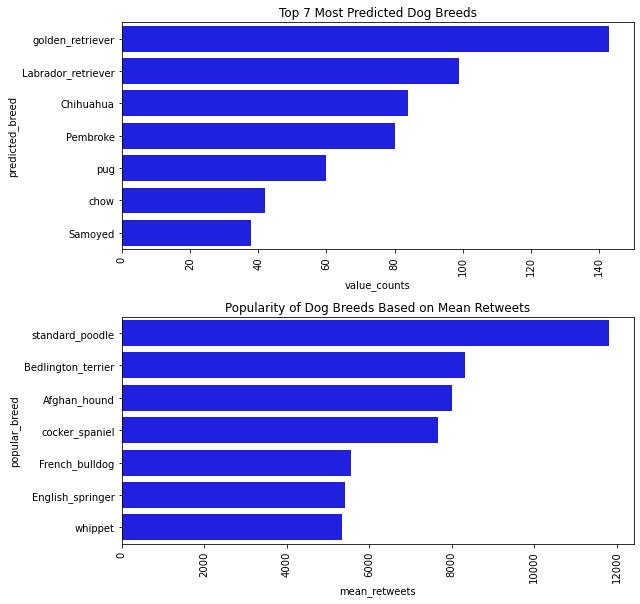

In [125]:
# Compare most predicted dog breeds with popular dog breeds based on retweets by plotting bar graphs

fig = plt.figure(figsize=(9,8.5))

# Plot a bar graph based on the value counts
plt.subplot(211)
plt.title('Top 7 Most Predicted Dog Breeds')
sns.barplot(data=breeds, x='value_counts',  y = 'predicted_breed', color='blue')
plt.xticks(rotation=90)

# Plot a bar graph based on the mean of retweets for each breed
plt.subplot(212)
plt.title('Popularity of Dog Breeds Based on Mean Retweets')
sns.barplot(data=breeds, x = 'mean_retweets', y = 'popular_breed', color='blue')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

> Golden Retriever is the most predicted dog breed yet it is not amongst the most popular dog breeds. The most popular dog breeds based on retweets are different from the most predicted dog breeds.

### Insights:

1. There is a postive relationship between retweet_count and favorite_count. However, the scatter plot shows a line of zero values for favorite_count, against retweet_counts that are surprisingly high. Further investigation is needed to check if these zero values are errors, which is too complicated for this project.

5. Pupper is the most common dog stage, yet it has the third lowest mean number of retweets. doggo-floofer is the least common stage yet it has the highest mean number of retweets. Some limitations to the bar graphs for popular dog stages are that dog_stages has too many null values, and there are dogs with 2 stages, making it difficult to know which of the stages contributes the most to the number of retweets.

6. Golden retriever is the dog breed most likely to be predicted by the neural network, followed  by labrador retriever, but it is not necessarily the most popular dog breed based on retweet_count. The top 7 dog breeds for the most likely predictions are not the top 7 dogs in number of image retweets.

### Visualization

### Visual #1: Positive Correlation between retweet_count and favorite_count

[Text(0.5, 1.0, 'Relationship between Retweets and Favorite Tweets')]

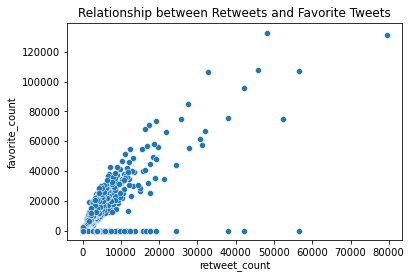

In [126]:
# As aformentioned, there us a positive correlation between retweets and favotite tweets
sns.scatterplot(data=master_df, x="retweet_count", 
                y="favorite_count").set(title = 'Relationship between Retweets and Favorite Tweets')

> However, there is a line of zero values for favorite_count, even for high retweet_counts, which is most likely an error.

### Next, inspect extreme rating_numerator outlier (1776) and some of the very low rating numerators

In [127]:
master_df.query('rating_numerator==1776 or rating_numerator==0')

,tweet_id,jpg_url,dog_breed,p_conf,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stages,retweet_count,favorite_count
920,749417653287129088,https://pbs.twimg.com/media/CmZ3YH9WEAAowi3.jpg,papillon,0.772894,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,Atticus,NaN,1904,6721
1295,834931633769889797,https://pbs.twimg.com/media/C5ZF4p-XEAEmApg.jpg,soft-coated_wheaten_terrier,0.196476,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,None,NaN,1878,11838


### Visual #2: Inspect Image for dog with rating_numerator of 1776

In [128]:
# Get image url from jpg_url column
master_df['jpg_url'][920]

'https://pbs.twimg.com/media/CmZ3YH9WEAAowi3.jpg'

> url for this image is https://pbs.twimg.com/media/CmZ3YH9WEAAowi3.jpg

In [ ]:
# Read image from url and save to working directory
# Print tweet caption that comes with image

#Source: https://stackoverflow.com/questions/12116050/how-to-plot-remote-image-from-http-url

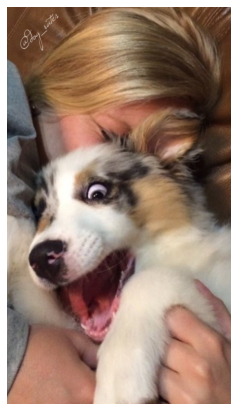

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh


In [129]:
from skimage import io

url = "https://pbs.twimg.com/media/CmZ3YH9WEAAowi3.jpg"
image = io.imread(url)
plt.figure(figsize = (4,10))
plt.imshow(image)
plt.axis('off')
plt.savefig("visual2.jpg", bbox_inches='tight')
plt.show()

print(master_df['text'][920])

> The image shows an adorable puppy and it is clear from the caption that the rating was intentional, as part of WeRateDog's unique rating system.

### Visual #3: Inspect Inspect Image for Dog with rating_numerator of 0

In [130]:
# Get image url from jpg_url column
master_df['jpg_url'][1295]

'https://pbs.twimg.com/media/C5ZF4p-XEAEmApg.jpg'

> The image url is https://pbs.twimg.com/media/C5ZF4p-XEAEmApg.jpg

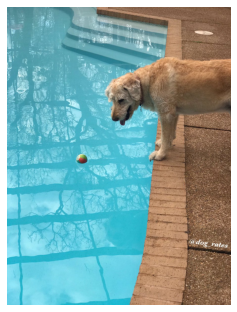

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag


In [131]:
# Read image from url and save to working directory
# Print tweet caption that comes with the image 

url = "https://pbs.twimg.com/media/C5ZF4p-XEAEmApg.jpg"
image2 = io.imread(url)
plt.figure(figsize = (4,10))
plt.imshow(image2)
plt.axis('off')
plt.savefig("visual3.jpg", bbox_inches='tight')
plt.show()

print(master_df['text'][1295])

> This image shows a cute dog by the pool and who would want to give it a poor rating? The light-hearted and humorous caption shows that the rating was meant in jest.